In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

# Task 1: Linear Regression

In [2]:
#setting initial data
np.random.seed(42)
dots_amount = 500
a = 2
b = 5
noise = np.random.normal(0, 1, dots_amount)
x = np.random.uniform(0, 1, dots_amount)
y = a * x + b + noise

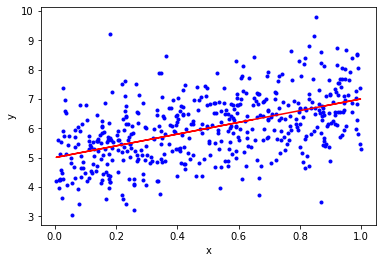

In [3]:
#displaying the dots
plt.scatter(x, y, marker = '.', color='blue')
plt.plot(x, a*x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#gradient descent
iter = 1000
l_r = 0.1
a1, b1, = 10, 10
cost = 0

def cal_cost(a, b, X, y):
    m = len(X)
    return  (1/(2 * m)) * sum(np.square((x*a + b) - y))

def gradient(X, Y, iterations, learning_rate, a1, b1):
    m = len(X)
    for i in range(iterations):
        a1 = a1 - learning_rate * np.sum(((X*a1 + b1) - Y) * X)/m
        b1 = b1 - learning_rate * np.sum(((X*a1 + b1) - Y))/m
    cost = cal_cost(a1, b1, X, Y)
    return a1, b1, cost

a1, b1, cost = gradient(x, y, iter, l_r, a1, b1);

In [5]:
#result
print(f' Initial params: a = {a}, b = {b}')
print(f' Result params: a = {a1}, b = {b1} ')

 Initial params: a = 2, b = 5
 Result params: a = 1.9684193322725123, b = 5.02251174295026 


# Task 2: Logistic Regression

In [6]:
#creating datasets

m1 = [-3, 0]
c1 = [[2, -1], 
     [-1, 1]]
x1 = np.random.multivariate_normal(m1, c1, dots_amount)

m2 = [1, 3]
c2 = [[1, 0], 
     [0, 3]]
x2 = np.random.multivariate_normal(m2, c2, dots_amount)

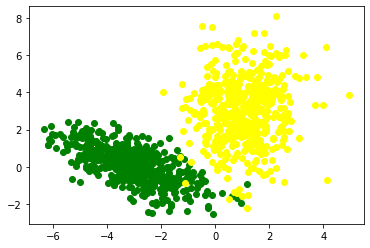

In [7]:
#visualizing 
plt.scatter(x1[:, 0], x1[:, 1], color='green')
plt.scatter(x2[:, 0], x2[:, 1], color='yellow')

In [8]:
X = np.concatenate([x1, x2])
Y = np.array([0] * dots_amount + [1] * dots_amount)

l_r = 0.01
iters = 10000
X_train, X_test = X[:150,:], X[50:,:]
Y_train, Y_test = Y[:150], Y[50:]

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, Y, iterations, learning_rate) :
        m, n = X.shape
        W = np.zeros(n)
        b = 0
        for i in range(iterations) :
            A = sigmoid(X.dot(W ) + b)
            tmp = ( A - Y.T )
            tmp = np.reshape( tmp, m )
            dW = np.dot( X.T, tmp ) / m
            db = np.sum( tmp ) / m
            W = W - learning_rate * dW
            b = b - learning_rate * db
        return W, b

def predict(W, b, X) :
    Z = sigmoid(X.dot( W ) + b )
    Y = np.where( Z > 0.5, 1, 0 )
    return Y
    
    
W, b =  logistic_regression(X_train, Y_train, iters, l_r)
Y_pred = predict(W, b, X_test)
print('Accuracy: ', accuracy_score(Y_pred, Y_test))

Accuracy:  0.9273684210526316
